In [29]:
import pandas as pd
import numpy as np


In [30]:
df=pd.read_csv('/content/diabetes.csv')

In [31]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [33]:
df.corr()['Outcome']

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


In [34]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [36]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [112]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout

In [39]:
model=Sequential()
model.add(Dense(32,activation='relu',input_dim=8))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
history=model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7053 - loss: 0.6003 - val_accuracy: 0.7208 - val_loss: 0.5644
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7202 - loss: 0.5661 - val_accuracy: 0.7532 - val_loss: 0.5403
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7004 - loss: 0.5633 - val_accuracy: 0.7597 - val_loss: 0.5215
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7195 - loss: 0.5257 - val_accuracy: 0.7857 - val_loss: 0.5095
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7432 - loss: 0.5181 - val_accuracy: 0.7727 - val_loss: 0.4993
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7324 - loss: 0.5283 - val_accuracy: 0.7857 - val_loss: 0.4929
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7893 - loss: 0.4792 - val_accuracy: 0.7922 - val_loss: 0.4872
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7572 - loss: 0.5016 - val_accuracy: 0.7922 - 

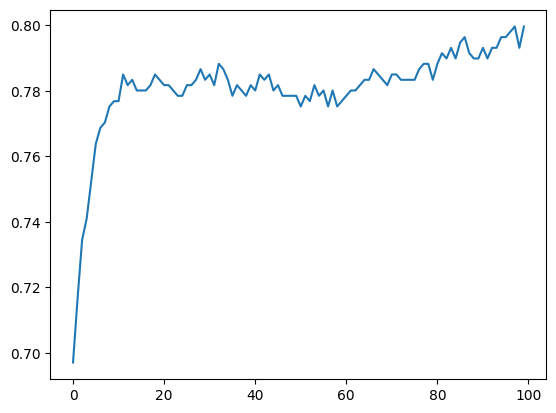

In [43]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

In [45]:
!pip install -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.7 MB/s eta 0:00:00


In [46]:
import kerastuner as kt

/tmp/ipython-input-1654478174.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [48]:
def build_model(hp):
  model=Sequential()

  model.add(Dense(32,activation='relu',input_dim=8))
  model.add(Dense(1,activation='sigmoid'))
  optimizer=hp.Choice('optimizer',values=['adam','adadelta','rmsprop','sgd'])

  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [49]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 4 Complete [00h 00m 02s]
val_accuracy: 0.5649350881576538

Best val_accuracy So Far: 0.7792207598686218
Total elapsed time: 00h 00m 07s


In [52]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [53]:
model=tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [54]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7371 - loss: 0.5481 - val_accuracy: 0.7662 - val_loss: 0.5402
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7463 - loss: 0.5173 - val_accuracy: 0.7662 - val_loss: 0.5236
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7661 - loss: 0.5026 - val_accuracy: 0.7662 - val_loss: 0.5111
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7428 - loss: 0.4934 - val_accuracy: 0.7662 - val_loss: 0.5009
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7686 - loss: 0.4692 - val_accuracy: 0.7727 - val_loss: 0.4949
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7700 - loss: 0.4844 - val_accuracy: 0.7662 - val_loss: 0.4906
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7757 - loss: 0.4714 - val_accuracy: 0.7792 - val_loss: 0.4874
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7634 - loss: 0.4675 - val_accuracy: 0.77

In [63]:
def build_model(hp):
  model=Sequential()
  units=hp.Int('units',min_value=8,max_value=128,step=8)
  model.add(Dense(units,activation='relu',input_dim=8))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
  return model



In [64]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='mydir')

Reloading Tuner from mydir/untitled_project/tuner0.json


In [65]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

In [66]:
tuner.get_best_hyperparameters()[0].values

{'units': 72}

In [67]:
model=tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [68]:
model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7731 - loss: 0.5291 - val_accuracy: 0.8052 - val_loss: 0.4944
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7702 - loss: 0.5008 - val_accuracy: 0.7922 - val_loss: 0.4776
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7714 - loss: 0.4790 - val_accuracy: 0.7792 - val_loss: 0.4690
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7929 - loss: 0.4637 - val_accuracy: 0.7792 - val_loss: 0.4643
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7722 - loss: 0.4623 - val_accuracy: 0.7662 - val_loss: 0.4615
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7780 - loss: 0.4637 - val_accuracy: 0.7792 - val_loss: 0.4588
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7532 - loss: 0.4757 - val_accuracy: 0.7857 - val_loss: 0.4574
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7866 - loss: 0.4572 - val_accuracy: 0.79

In [69]:
def build_model(hp):
  model=Sequential()
  model.add(Dense(72,activation='relu',input_dim=8))
  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
    model.add(Dense(72,activation='relu'))

  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [74]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='mydir',project_name='adas')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 03s]
val_accuracy: 0.7922077775001526

Best val_accuracy So Far: 0.8311688303947449
Total elapsed time: 00h 00m 13s


In [76]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 3}

In [78]:
model=tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [82]:
history=model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9930 - loss: 0.0223 - val_accuracy: 0.7597 - val_loss: 1.5371
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9939 - loss: 0.0352 - val_accuracy: 0.7987 - val_loss: 1.5559
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9940 - loss: 0.0111 - val_accuracy: 0.7468 - val_loss: 1.5020
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9851 - loss: 0.0512 - val_accuracy: 0.7662 - val_loss: 1.4655
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9942 - loss: 0.0198 - val_accuracy: 0.7597 - val_loss: 1.5108
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9993 - loss: 0.0144 - val_accuracy: 0.7532 - val_loss: 1.4705
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9988 - loss: 0.0061 - val_accuracy: 0.7727 - val_loss: 1.4861
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9969 - loss: 0.0122 - val_accuracy: 0.7

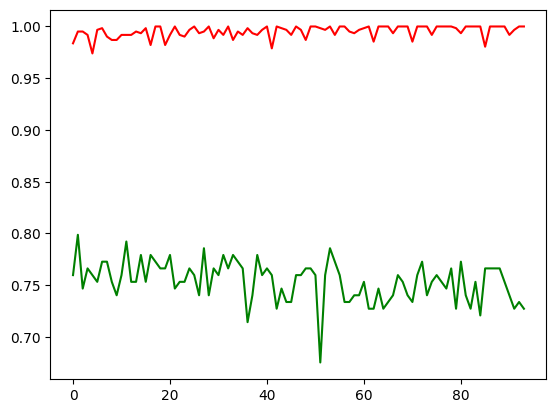

In [85]:
plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'],color='green')

In [113]:
def build_model(hp):
  model=Sequential()
  counter=0

  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
    if counter==0:
      model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),activation=hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid']),input_dim=8))
      model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    else:
      model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),activation=hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid'])))
      model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    counter+=1
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=hp.Choice('optimizer',values=['rmsprop','sgd','adam','adadelta','nadam']),loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [114]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='mydir',project_name='adaaass')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [115]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 03s]
val_accuracy: 0.6428571343421936

Best val_accuracy So Far: 0.6428571343421936
Total elapsed time: 00h 00m 17s


In [116]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 8,
 'units0': 128,
 'activation0': 'relu',
 'dropout0': 0.4,
 'optimizer': 'rmsprop',
 'units1': 120,
 'activation1': 'tanh',
 'dropout1': 0.2,
 'units2': 88,
 'activation2': 'tanh',
 'dropout2': 0.5,
 'units3': 112,
 'activation3': 'tanh',
 'dropout3': 0.1,
 'units4': 56,
 'activation4': 'sigmoid',
 'dropout4': 0.9,
 'units5': 64,
 'activation5': 'relu',
 'dropout5': 0.5,
 'units6': 88,
 'activation6': 'sigmoid',
 'dropout6': 0.8,
 'units7': 48,
 'activation7': 'sigmoid',
 'dropout7': 0.5,
 'units8': 88,
 'activation8': 'tanh',
 'dropout8': 0.4,
 'units9': 40,
 'activation9': 'tanh',
 'dropout9': 0.8}

In [117]:
model=tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 20 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [118]:
model.fit(X_train,y_train,batch_size=32,epochs=200,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5790 - loss: 0.7259 - val_accuracy: 0.6429 - val_loss: 0.6548
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5788 - loss: 0.7200 - val_accuracy: 0.6429 - val_loss: 0.6545
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6124 - loss: 0.6771 - val_accuracy: 0.6429 - val_loss: 0.6536
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5743 - loss: 0.6950 - val_accuracy: 0.6429 - val_loss: 0.6573
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6165 - loss: 0.7320 - val_accuracy: 0.6429 - val_loss: 0.6558
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6006 - loss: 0.6796 - val_accuracy: 0.6429 - val_loss: 0.6531
Epoch 13/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5810 - loss: 0.7017 - val_accuracy: 0.6429 - val_loss: 0.6507
Epoch 14/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5870 - loss: 0.6958 - val_accuracy: 0.64